# Analysis of COVID-19 data from South Korea

#### Information on COVID-19:
    
Coronavirus disease 2019 (COVID-19) is an infectious disease that was first discovered in Wuhan, China in December 2019, where the outbreak began. The most common syptoms are fever, tiredness and dry cough. About 80% of the infected recover without special treatment.
Around 1 out of every 6 people becomes seriously ill and develops difficulty breathing.
Older people, and those with underlying medical problems, are more likely to develop serious illness.
The disease can spread from person to person through small droplets from the nose or mouth.
The incubation period of the disease is commonly around five days, but ranges from 1-14 days.
Source: https://www.who.int/news-room/q-a-detail/q-a-coronaviruses (retrieved 2020-03-10)

Link for the dataset : (https://www.kaggle.com/kimjihoo/coronavirusdataset)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime
import warnings
warnings.filterwarnings('ignore')

#### Reading required Datasets

In [2]:
patient = pd.read_csv("/home/praveen/Downloads/Data Science/Kaggle/Covid-19 SK/coronavirusdataset/patient.csv")

# Study of Patients

In [3]:
patient.head()

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [4]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7869 entries, 0 to 7868
Data columns (total 15 columns):
patient_id          7869 non-null int64
sex                 679 non-null object
birth_year          666 non-null float64
country             7869 non-null object
region              437 non-null object
disease             28 non-null float64
group               86 non-null object
infection_reason    154 non-null object
infection_order     36 non-null float64
infected_by         70 non-null float64
contact_number      53 non-null float64
confirmed_date      7869 non-null object
released_date       56 non-null object
deceased_date       36 non-null object
state               7869 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 922.3+ KB


In [5]:
patient['age'] = 2020.0 - patient['birth_year']

In [6]:
date_str = '2020-03-15'
date_obj = datetime.datetime.strptime(date_str, '%Y-%m-%d')

date_obj = pd.to_datetime(date_obj)
print(date_obj.date())

2020-03-15


In [7]:
from datetime import date

date_s = date(2020, 2, 23)

date_s = pd.to_datetime(date_s)
date_s.date()

datetime.date(2020, 2, 23)

In [8]:
patient['confirmed_date'] = pd.to_datetime(patient['confirmed_date'])
patient['released_date'] = pd.to_datetime(patient['released_date'])
patient['deceased_date'] = pd.to_datetime(patient['deceased_date'])

In [9]:
def count_day(data, col1, col2):
    c = data[col1] - data[col2]
    print(c)

In [10]:
# Function for counting Categorical features
def count(data, col, ti, a, b):
    na = data[col].isnull().sum()
    print("Null values in the feature :", na)
    print('-'*50)
    
    print("Percentage of each category -")
    c = data[col].value_counts(normalize=2).head()
    print(round(c*100, 2))
    print('-'*50)
    
    plt.figure(figsize=[a,b])
    sns.countplot(data[col])
    plt.title(ti)
    plt.xticks(rotation=90)
    plt.show()

### Univariate Analysis

Null values in the feature : 7190
--------------------------------------------------
Percentage of each category -
female    57.88
male      42.12
Name: sex, dtype: float64
--------------------------------------------------


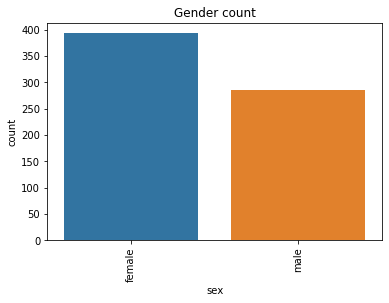

In [11]:
count(patient, 'sex', 'Gender count', 6, 4)

Null values in the feature : 0
--------------------------------------------------
Percentage of each category -
Korea       99.89
China        0.10
Mongolia     0.01
Name: country, dtype: float64
--------------------------------------------------


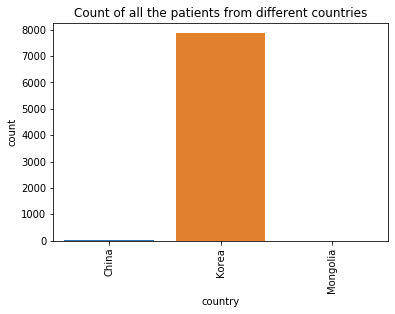

In [12]:
count(patient, 'country', 'Count of all the patients from different countries', 6, 4)

The feature signifies that most patients are from Korea itself.

Null values in the feature : 0
--------------------------------------------------
Percentage of each category -
isolated    98.83
released     0.71
deceased     0.46
Name: state, dtype: float64
--------------------------------------------------


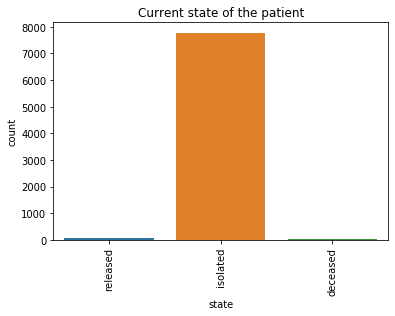

In [13]:
count(patient, 'state', 'Current state of the patient', 6, 4)

Since the dataset has no null values, this data can be called as correct. We see that there are many patients who are still kept in isolation. The rate of patients recovering is lower compared to the population who have been infected. While the number of diseased patients are lower compared to those who have recovered.

Null values in the feature : 7833
--------------------------------------------------
Percentage of each category -
1.0    36.11
2.0    27.78
3.0    16.67
5.0     8.33
4.0     5.56
Name: infection_order, dtype: float64
--------------------------------------------------


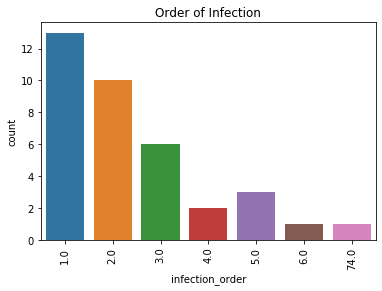

In [14]:
count(patient, 'infection_order', 'Order of Infection', 6, 4)

Null values in the feature : 7783
--------------------------------------------------
Percentage of each category -
Shincheonji Church               67.44
Eunpyeong St. Mary's Hospital    15.12
Cheongdo Daenam Hospital         10.47
Pilgrimage                        6.98
Name: group, dtype: float64
--------------------------------------------------


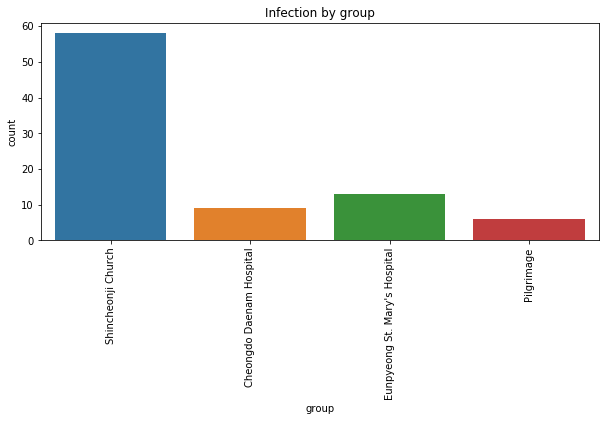

In [15]:
count(patient, 'group', 'Infection by group', 10, 4)

Null values in the feature : 7715
--------------------------------------------------
Percentage of each category -
contact with patient    49.35
visit to Daegu          32.47
visit to Wuhan           5.19
pilgrimage to Israel     3.90
residence in Wuhan       1.30
Name: infection_reason, dtype: float64
--------------------------------------------------


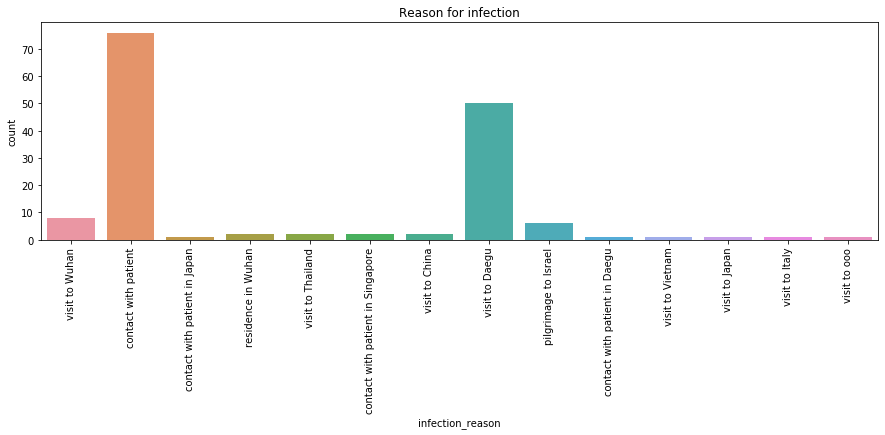

In [16]:
count(patient, 'infection_reason', 'Reason for infection', 15, 4)

There are high number of null values in the dataset. But with the data present we can infer that -
1. The major reason for infection was due to the person coming in contact with already infected patients.
2. Other major reason for infection are visit to cities like Daegu and even the chinese city of Wuhan.
3. There also patients who are infected due to pilgrimage to Israel.

### Studying the contact with patient for reason for infection 

Null values in the feature : 7799
--------------------------------------------------
Percentage of each category -
31.0     11.43
6.0       7.14
126.0     4.29
780.0     4.29
372.0     4.29
Name: infected_by, dtype: float64
--------------------------------------------------


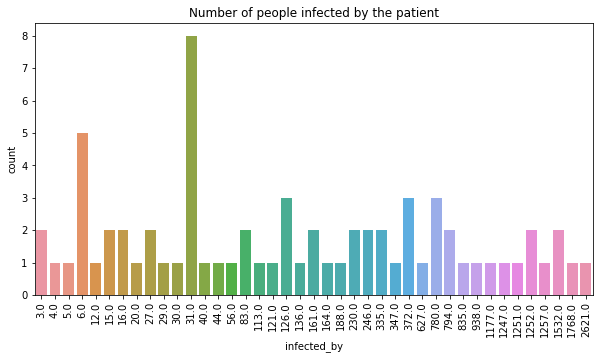

In [17]:
count(patient, 'infected_by',"Number of people infected by the patient", 10, 5)

In [18]:
patient.groupby(['infection_reason','infected_by'])['patient_id'].count().reset_index()

,infection_reason,infected_by,patient_id
0,contact with patient,3.0,2
1,contact with patient,4.0,1
2,contact with patient,5.0,1
3,contact with patient,6.0,4
4,contact with patient,12.0,1
5,contact with patient,15.0,1
6,contact with patient,16.0,2
7,contact with patient,20.0,1
8,contact with patient,27.0,2
9,contact with patient,29.0,1


#### Patient ID 31

In [19]:
patient[patient['patient_id'] == 31]

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
30,31,female,1959.0,Korea,Daegu,NaN,Shincheonji Church,NaN,NaN,NaN,1160.0,2020-02-18,NaT,NaT,isolated,61.0


we see that the patient with ID 31 has infected a group of 8 members, the date she was confirmed was 18th February 2020

#### Patients infected by 31

In [20]:
# Function to trace the patients
def trace_pat(data, pat):
    b = data['infected_by'].value_counts(normalize=2).reset_index()
    c = data[data['patient_id'] == pat]
    d = data['contact_number'].value_counts(normalize=2).reset_index()
    e = data[data['infected_by'] == pat]
    
#     Patient details
    print("The Patient :", pat, "\n")
   
    print(b[b['index']==pat])
    print('-'*50)
    print(d[d['index']==pat])
    print('-'*50)
    print(c)
    print('-'*50)
    
#     Vessel who infected the current Patient
    print("The Vessel for the virus :\n")
    
    for i in data[data['patient_id']==pat]['infected_by']:
        if i != np.nan:
            print(data[data['patient_id']==i])
        else:
            print("No record")
            
    print('-'*100)
    
#     Details of the patients who were infected when they came in contact with the above patient
    print("Patients who were infected by :", pat)
            
    return e.drop(['birth_year','disease','infected_by'], 1)

In [21]:
trace_pat(patient, 31)

The Patient : 31 

   index  infected_by
0   31.0     0.114286
--------------------------------------------------
   index  contact_number
4   31.0        0.037736
--------------------------------------------------
    patient_id     sex  birth_year country region  disease  \
30          31  female      1959.0   Korea  Daegu      NaN   

                 group infection_reason  infection_order  infected_by  \
30  Shincheonji Church              NaN              NaN          NaN   

    contact_number confirmed_date released_date deceased_date     state   age  
30          1160.0     2020-02-18           NaT           NaT  isolated  61.0  
--------------------------------------------------
The Vessel for the virus :

Empty DataFrame
Columns: [patient_id, sex, birth_year, country, region, disease, group, infection_reason, infection_order, infected_by, contact_number, confirmed_date, released_date, deceased_date, state, age]
Index: []
------------------------------------------------------

,patient_id,sex,country,region,group,infection_reason,infection_order,contact_number,confirmed_date,released_date,deceased_date,state,age
32,33,female,Korea,Daegu,NaN,contact with patient,NaN,NaN,2020-02-18,NaT,NaT,isolated,40.0
46,47,female,Korea,Daegu,Shincheonji Church,contact with patient,NaN,NaN,2020-02-19,NaT,NaT,isolated,63.0
47,48,female,Korea,Daegu,Shincheonji Church,contact with patient,NaN,NaN,2020-02-19,NaT,NaT,isolated,72.0
48,49,male,Korea,Daegu,Shincheonji Church,contact with patient,NaN,NaN,2020-02-19,NaT,NaT,isolated,58.0
49,50,male,Korea,Daegu,Shincheonji Church,contact with patient,NaN,NaN,2020-02-19,2020-03-02,NaT,released,76.0
50,51,female,Korea,Daegu,Shincheonji Church,contact with patient,NaN,NaN,2020-02-19,2020-02-26,NaT,released,61.0
139,140,female,Korea,Daegu,NaN,contact with patient,NaN,NaN,2020-02-21,NaT,NaT,isolated,32.0
161,162,male,Korea,Daegu,NaN,contact with patient,NaN,NaN,2020-02-21,NaT,NaT,isolated,33.0


#### Patient ID 6

In [22]:
trace_pat(patient, 6)

The Patient : 6 

   index  infected_by
1    6.0     0.071429
--------------------------------------------------
    index  contact_number
13    6.0        0.018868
--------------------------------------------------
   patient_id   sex  birth_year country        region  disease group  \
5           6  male      1964.0   Korea  capital area      NaN   NaN   

       infection_reason  infection_order  infected_by  contact_number  \
5  contact with patient              2.0          3.0            17.0   

  confirmed_date released_date deceased_date     state   age  
5     2020-01-30    2020-02-19           NaT  released  56.0  
--------------------------------------------------
The Vessel for the virus :

   patient_id   sex  birth_year country        region  disease group  \
2           3  male      1966.0   Korea  capital area      NaN   NaN   

  infection_reason  infection_order  infected_by  contact_number  \
2   visit to Wuhan              1.0          NaN            16.0   

  con

,patient_id,sex,country,region,group,infection_reason,infection_order,contact_number,confirmed_date,released_date,deceased_date,state,age
9,10,female,Korea,capital area,NaN,contact with patient,3.0,43.0,2020-01-31,2020-02-19,NaT,released,54.0
10,11,male,Korea,capital area,NaN,contact with patient,3.0,0.0,2020-01-31,2020-02-10,NaT,released,25.0
20,21,female,Korea,capital area,NaN,contact with patient,3.0,6.0,2020-02-05,2020-02-29,NaT,released,60.0
82,83,male,Korea,capital area,NaN,contact with patient,3.0,NaN,2020-02-20,2020-03-01,NaT,released,76.0
1256,1257,female,Korea,Daejeon,NaN,visit to Daegu,NaN,NaN,2020-02-26,NaT,NaT,isolated,39.0


We see the patients infected by patient ID 6. What we observe is -
1. He was infected by patient ID 3 who had a travel history to Wuhan. It seems like the patients 3 and 6 are related since they live in the same region.
2. The patients 10, 11, 21 and 83 also seem to be a close relation to patients 3 and 6.
3. Patients 3 and 6 were cured at 12th february and 19th february respectively and were discharged, while the patients 10, 11, 21, 83 were released in the following days.
4. Among the patients infected 10, 11 and 21 seem to have come in contact with patient 6 while he was hospitalized or after he came in contact with patient 3.
5. Patient 83 was confirmed positive for the virus one day after patient 6 was released from the hospital.
6. Patient 1257's data shows that the patient had been confirmed 7 days after patient 6 was released. The patient's data is most unique since her origin city is Daejeon and her reason for infection is Visit to Daegu.

#### Patient ID 780

In [23]:
trace_pat(patient, 780)

The Patient : 780 

   index  infected_by
3  780.0     0.042857
--------------------------------------------------
Empty DataFrame
Columns: [index, contact_number]
Index: []
--------------------------------------------------
     patient_id   sex  birth_year country        region  disease group  \
779         780  male      1965.0   Korea  capital area      NaN   NaN   

    infection_reason  infection_order  infected_by  contact_number  \
779   visit to Daegu              NaN          NaN             NaN   

    confirmed_date released_date deceased_date     state   age  
779     2020-02-24           NaT           NaT  isolated  55.0  
--------------------------------------------------
The Vessel for the virus :

Empty DataFrame
Columns: [patient_id, sex, birth_year, country, region, disease, group, infection_reason, infection_order, infected_by, contact_number, confirmed_date, released_date, deceased_date, state, age]
Index: []
--------------------------------------------------------

,patient_id,sex,country,region,group,infection_reason,infection_order,contact_number,confirmed_date,released_date,deceased_date,state,age
793,794,female,Korea,capital area,NaN,contact with patient,NaN,NaN,2020-02-24,NaT,NaT,isolated,50.0
796,797,male,Korea,capital area,NaN,contact with patient,NaN,NaN,2020-02-24,NaT,NaT,isolated,20.0
886,887,female,Korea,capital area,NaN,contact with patient,NaN,NaN,2020-02-25,NaT,NaT,isolated,44.0


Observations from Patient ID 780's data-
1. Patient 780 had a travel history to Daegu and there seems no details of the person he was infected by.
2. Since the infected patients 794, 797 and 887 have similar data, i.e, region and have been confirmed within two days of patient 780 being hospitalized, we can say that all of the patients are related to or know each other.

Null values in the feature : 7816
--------------------------------------------------
Percentage of each category -
2.0     9.43
0.0     7.55
23.0    5.66
1.0     5.66
31.0    3.77
Name: contact_number, dtype: float64
--------------------------------------------------


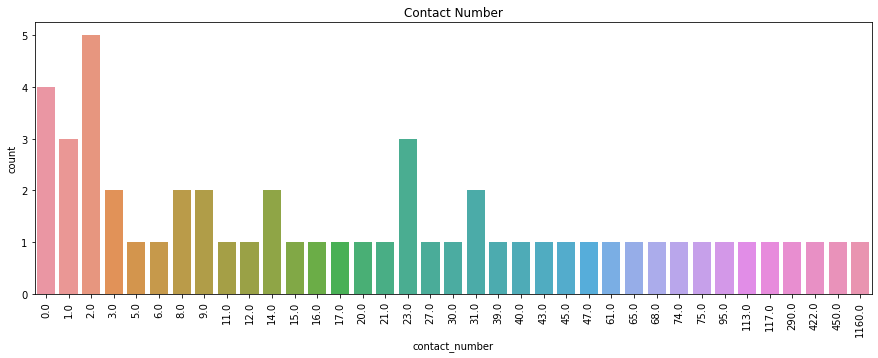

In [24]:
count(patient, 'contact_number', "Contact Number", 15, 5)

In [25]:
patient[['patient_id','contact_number','infection_reason']].dropna()

,patient_id,contact_number,infection_reason
0,1,45.0,visit to Wuhan
1,2,75.0,visit to Wuhan
2,3,16.0,visit to Wuhan
3,4,95.0,visit to Wuhan
4,5,31.0,visit to Wuhan
5,6,17.0,contact with patient
6,7,9.0,visit to Wuhan
7,8,113.0,visit to Wuhan
8,9,2.0,contact with patient
9,10,43.0,contact with patient


### Patients with Infection order 1

In [26]:
net = patient.groupby(['infection_order','patient_id']).max().reset_index()
net

,infection_order,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1.0,1,female,1984.0,China,filtered at airport,NaN,NaN,visit to Wuhan,NaN,45.0,2020-01-20,2020-02-06,NaT,released,36.0
1,1.0,2,male,1964.0,Korea,filtered at airport,NaN,NaN,visit to Wuhan,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0
2,1.0,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0
3,1.0,4,male,1964.0,Korea,capital area,NaN,NaN,visit to Wuhan,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0
4,1.0,5,male,1987.0,Korea,capital area,NaN,NaN,visit to Wuhan,NaN,31.0,2020-01-30,2020-03-02,NaT,released,33.0
5,1.0,7,male,1991.0,Korea,capital area,NaN,NaN,visit to Wuhan,NaN,9.0,2020-01-30,2020-02-15,NaT,released,29.0
6,1.0,8,female,1957.0,Korea,Jeollabuk-do,NaN,NaN,visit to Wuhan,NaN,113.0,2020-01-31,2020-02-12,NaT,released,63.0
7,1.0,13,male,1992.0,Korea,filtered at airport,NaN,NaN,residence in Wuhan,NaN,0.0,2020-02-02,2020-02-24,NaT,released,28.0
8,1.0,16,female,1977.0,Korea,Gwangju,NaN,NaN,visit to Thailand,NaN,450.0,2020-02-04,2020-02-19,NaT,released,43.0
9,1.0,23,female,1962.0,China,capital area,NaN,NaN,visit to Wuhan,NaN,23.0,2020-02-06,2020-02-29,NaT,released,58.0


#### Studying the reason for infection for the parent patients

Null values in the feature : 0
--------------------------------------------------
Percentage of each category -
visit to Wuhan          61.54
residence in Wuhan      15.38
visit to China           7.69
visit to Thailand        7.69
contact with patient     7.69
Name: infection_reason, dtype: float64
--------------------------------------------------


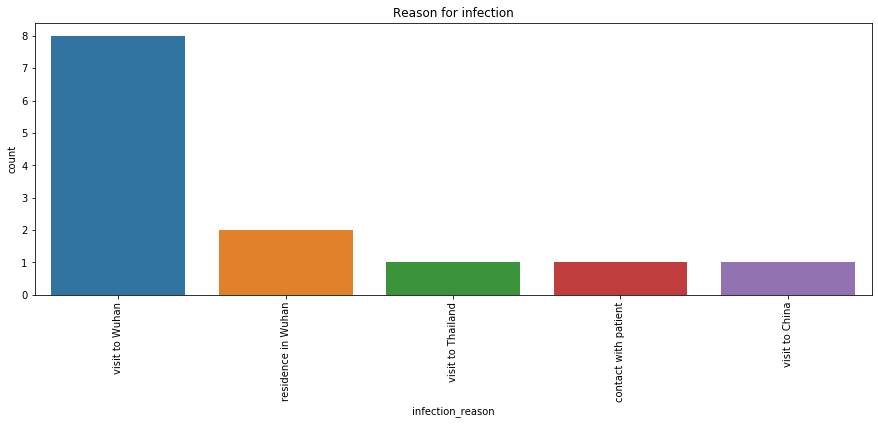

In [27]:
count(net[net['infection_order']==1.0], 'infection_reason', 'Reason for infection', 15,5)

All the parent patients who were hospitalised had a travel history except patient 26 who seems to have come in contact with patient 27. 10 patients from the 13 parent patients had traveled to Wuhan, while 2 are chinese citizens.

Null values in the feature : 0
--------------------------------------------------
Percentage of each category -
capital area           75.00
filtered at airport    11.11
Gwangju                 8.33
Jeollabuk-do            2.78
Jeju-do                 2.78
Name: region, dtype: float64
--------------------------------------------------


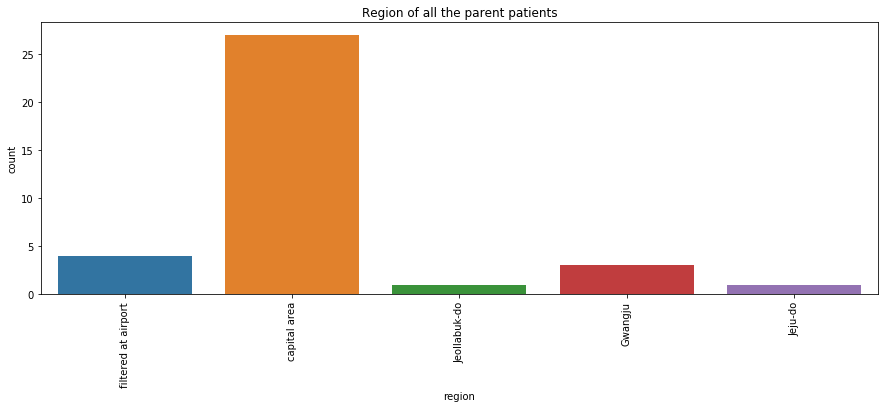

In [28]:
count(net, 'region', 'Region of all the parent patients', 15, 5)

Tracing the virus's route for the following network-
1. 362 - 30 - 29 - 83 - 6 - 3
2. 136 - 56 - 83 - 6 - 3
3. 21 - 6 - 3
4. 20 - 15 - 4

In [29]:
first = patient[patient['patient_id']==3]
second = patient[patient['patient_id']==6]
third = patient[patient['patient_id']==83]
fourth = patient[patient['patient_id']==29]
fifth = patient[patient['patient_id']==30]
sixth = patient[patient['patient_id']==362]

In [30]:
pat_net = pd.concat([first, second, third, fourth, fifth, sixth], 0)

#### Route 3 - 362

In [31]:
pat_net

,patient_id,sex,birth_year,country,region,disease,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
2,3,male,1966.0,Korea,capital area,NaN,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0
5,6,male,1964.0,Korea,capital area,NaN,NaN,contact with patient,2.0,3.0,17.0,2020-01-30,2020-02-19,NaT,released,56.0
82,83,male,1944.0,Korea,capital area,NaN,NaN,contact with patient,3.0,6.0,NaN,2020-02-20,2020-03-01,NaT,released,76.0
28,29,male,1938.0,Korea,capital area,NaN,NaN,contact with patient,4.0,83.0,117.0,2020-02-16,NaT,NaT,isolated,82.0
29,30,female,1952.0,Korea,capital area,NaN,NaN,contact with patient,5.0,29.0,27.0,2020-02-16,NaT,NaT,isolated,68.0
361,362,male,1956.0,Korea,capital area,NaN,NaN,contact with patient,6.0,30.0,NaN,2020-02-22,NaT,NaT,isolated,64.0


After observing the virus path from patient 3 to patient 362, we see that-
1. a total of six patients were infected and hospitalized from 26 January to 22 February. We see that all the infected were betweent the age 54 and 82.
2. The parent patient (patient id 3) was infected when he visited Wuhan.
3. The data for patient 29 is quite unique since the patient was confirmed infected and hospitalized on 16th February, while the patient 83, who came in contact and infected 29 was hospitalized on 20th February.
4. The first 3 patients, i.e., 3, 6 and 83 have undergone treatment and have been discharged.

In [32]:
released = patient[patient['state']=='released']
deceased = patient[patient['state']=='deceased']

In [33]:
released['hosp_days'] = released['released_date'] - released['confirmed_date']

In [34]:
released.groupby(['hosp_days','patient_id','age']).max()

sex  birth_year country               region  \
hosp_days patient_id age                                                     
1 days    1013       39.0    male      1981.0   Korea         capital area   
3 days    2466       35.0    male      1985.0   Korea         capital area   
4 days    589        35.0  female      1985.0   Korea              Gwangju   
          2468       35.0  female      1985.0   Korea         capital area   
          2470       34.0    male      1986.0   Korea         capital area   
          2858       53.0    male      1967.0   Korea         capital area   
5 days    1256       33.0  female      1987.0   Korea              Daejeon   
          1370       28.0  female      1992.0   Korea         capital area   
          1378       36.0    male      1984.0   Korea         capital area   
          1567       27.0  female      1993.0   Korea         capital area   
          2733       51.0    male      1969.0   Korea         capital area   
6 days    1246       21.0  female      1999.0   Korea         capital area   
7 days    17         38.0    male      1982.0   Korea         capital area   
          28         31.0  female      1989.0   China         capital area   
          51         61.0  female      1959.0   Korea                Daegu   
          938        52.0    male      1968.0   Korea         capital area   
          1118       41.0    male      1979.0   Korea         capital area   
          1129       56.0    male      1964.0   Korea         capital area   
          1255       35.0  female      1985.0   Korea                  NaN   
8 days    37         47.0    male      1973.0   Korea     Gyeongsangbuk-do   
          63         52.0  female      1968.0   Korea                Daegu   
          65         50.0  female      1970.0   Korea                Daegu   
          927        35.0  female      1985.0   Korea         capital area   
          1244       51.0    male      1969.0   Korea     Gyeongsangbuk-do   
9 days    22         47.0    male      1973.0   Korea              Gwangju   
10 days   11         25.0    male      1995.0   Korea         capital area   
          83         76.0    male      1944.0   Korea         capital area   
          593        52.0    male      1968.0   Korea         capital area   
11 days   241        23.0  female      1997.0   Korea              Daejeon   
          347        24.0    male      1996.0   Korea         capital area   
12 days   2          56.0    male      1964.0   Korea  filtered at airport   
          8          63.0  female      1957.0   Korea         Jeollabuk-do   
          50         76.0    male      1944.0   Korea                Daegu   
13 days   4          56.0    male      1964.0   Korea         capital area   
14 days   18         21.0  female      1999.0   Korea              Gwangju   
          39         61.0  female      1959.0   Korea     Gyeongsangbuk-do   
          222        22.0  female      1998.0   Korea              Jeju-do   
15 days   16         43.0  female      1977.0   Korea              Gwangju   
          32         11.0  female      2009.0   Korea         capital area   
16 days   7          29.0    male      1991.0   Korea         capital area   
          14         40.0  female      1980.0   China         capital area   
          19         37.0    male      1983.0   Korea         capital area   
17 days   1          36.0  female      1984.0   China  filtered at airport   
          3          54.0    male      1966.0   Korea         capital area   
          12         49.0    male      1971.0   China         capital area   
19 days   10         54.0  female      1966.0   Korea         capital area   
          20         42.0  female      1978.0   Korea         capital area   
20 days   6          56.0    male      1964.0   Korea         capital area   
21 days   24         28.0    male      1992.0   Korea  filtered at airport   
22 days   13         28.0    male      1992.0   Kore

In [35]:
deceased['hosp_days'] = deceased['deceased_date'] - deceased['confirmed_date']

In [36]:
deceased.groupby(['hosp_days','patient_id','age']).max()

sex  birth_year   country            region  \
hosp_days patient_id age                                                    
-2 days   6285       91.0  female      1929.0     Korea  Gyeongsangbuk-do   
-1 days   104        63.0    male      1957.0     Korea  Gyeongsangbuk-do   
          205        55.0  female      1965.0     Korea  Gyeongsangbuk-do   
          443        41.0    male      1979.0     Korea  Gyeongsangbuk-do   
          925        69.0  female      1951.0     Korea  Gyeongsangbuk-do   
0 days    875        36.0    male      1984.0  Mongolia      capital area   
          1443       75.0    male      1945.0     Korea             Daegu   
          4046       58.0  female      1962.0     Korea             Daegu   
          5767       82.0    male      1938.0     Korea             Daegu   
          5768       85.0  female      1935.0     Korea  Gyeongsangbuk-do   
1 days    286        62.0    male      1958.0     Korea  Gyeongsangbuk-do   
          2579       80.0    male      1940.0     Korea  Gyeongsangbuk-do   
          2614       77.0  female      1943.0     Korea             Daegu   
          5143       60.0    male      1960.0     Korea  Gyeongsangbuk-do   
          5460       80.0    male      1940.0     Korea  Gyeongsangbuk-do   
          7196       75.0    male      1945.0     Korea             Daegu   
2 days    2769       86.0  female      1934.0     Korea             Daegu   
          3896       87.0    male      1933.0     Korea             Daegu   
3 days    107        67.0    male      1953.0     Korea  Gyeongsangbuk-do   
          298        58.0    male      1962.0     Korea  Gyeongsangbuk-do   
4 days    54         57.0    male      1963.0     Korea  Gyeongsangbuk-do   
          55         59.0    male      1961.0     Korea  Gyeongsangbuk-do   
          1064       77.0  female      1943.0     Korea             Daegu   
          1288       65.0    male      1955.0     Korea             Daegu   
5 days    38         57.0  female      1963.0     Korea             Daegu   
          114        74.0    male      1946.0     Korea             Daegu   
          2085       71.0    male      1949.0     Korea             Daegu   
6 days    1921       67.0    male      1953.0     Korea             Daegu   
          2289       66.0    male      1954.0     Korea             Daegu   
          2936       81.0    male      1939.0     Korea             Daegu   
          3578       90.0    male      1930.0     Korea             Daegu   
7 days    620        71.0    male      1949.0     Korea             Daegu   
8 days    901        86.0  female      1934.0     Korea             Daegu   
          3550       69.0  female      1951.0     Korea             Daegu   
          3914       82.0    male      1938.0     Korea             Daegu   
12 days   391        83.0    male      1937.0     Korea  Gyeongsangbuk-do   

                           disease                     group  \
hosp_days patient_id age                                       
-2 days   6285       91.0      NaN                       NaN   
-1 days   104        63.0      1.0  Cheongdo Daenam Hospital   
          205        55.0      1.0  Cheongdo Daenam Hospital   
          443        41.0      1.0                       NaN   
          925        69.0      1.0        Shincheonji Church   
0 days    875        36.0      1.0                       NaN   
          1443       75.0      NaN                       NaN   
          4046       58.0      1.0                       NaN   
          5767       82.0      1.0                       NaN   
          5768       85.0      NaN                       NaN   
1 days    286        62.0      1.0  Cheongdo Daenam Hospital   
          2579       80.0      1.0                       NaN   
          2614       77.0      1.0                       NaN   
          5143       60.0      1.0                       NaN   
          5460       80.0      1.0                       NaN   
          7196 

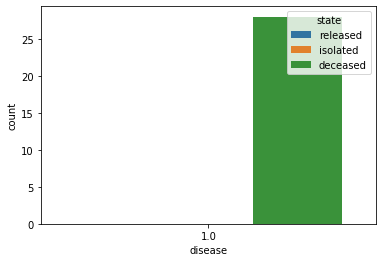

In [37]:
sns.countplot(patient['disease'], hue=patient['state'])
plt.show()

Observations-
1. The data for patients from 6285, 104, 205, 443 and 925 from Cheongdo Daenam hospital are patients who were infected but were only able to be confirmed after they had died.
2. It also seems that many of the patients who died were also diagonosed with other diseases.
3. The data on how did the patients get infected is missing.
4. The age range is between 41 and 91.

Null values in the feature : 0
--------------------------------------------------
Percentage of each category -
2020-03-01    13.50
2020-02-29    10.32
2020-03-02     7.62
2020-02-28     7.26
2020-03-05     6.58
Name: confirmed_date, dtype: float64
--------------------------------------------------


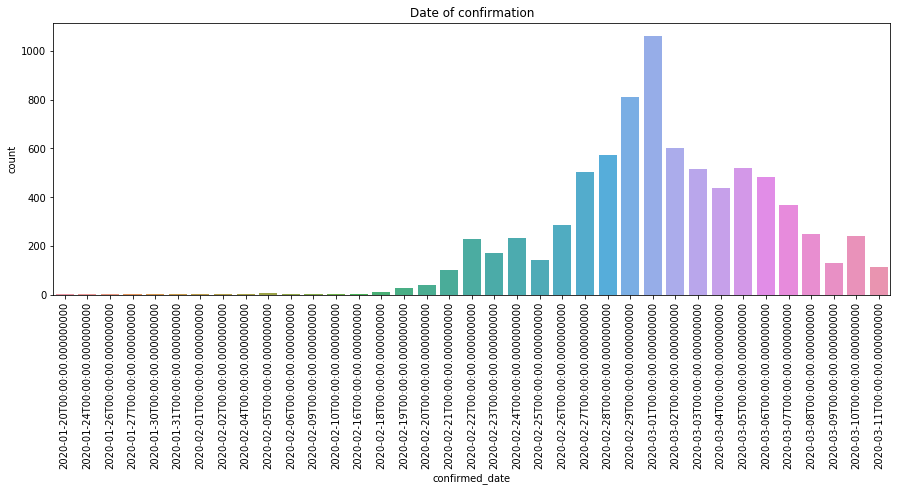

In [38]:
count(patient,'confirmed_date', 'Date of confirmation', 15, 5)

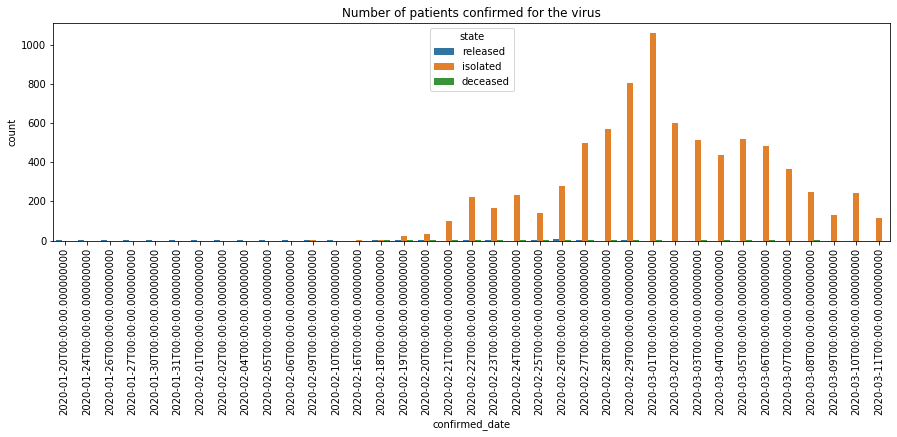

In [39]:
plt.figure(figsize=[15,4])
sns.countplot(patient['confirmed_date'], hue=patient['state'])
plt.title('Number of patients confirmed for the virus')
plt.xticks(rotation=90)
plt.show()

The number of patients confrimed started increasing from 20th february and was at its peak on 1st March. But after 1st march the number of patients being admitted into the hospital started reducing.

Null values in the feature : 0
--------------------------------------------------
Percentage of each category -
2020-03-05    16.67
2020-02-23    11.11
2020-03-04    11.11
2020-03-01    11.11
2020-03-09     8.33
Name: deceased_date, dtype: float64
--------------------------------------------------


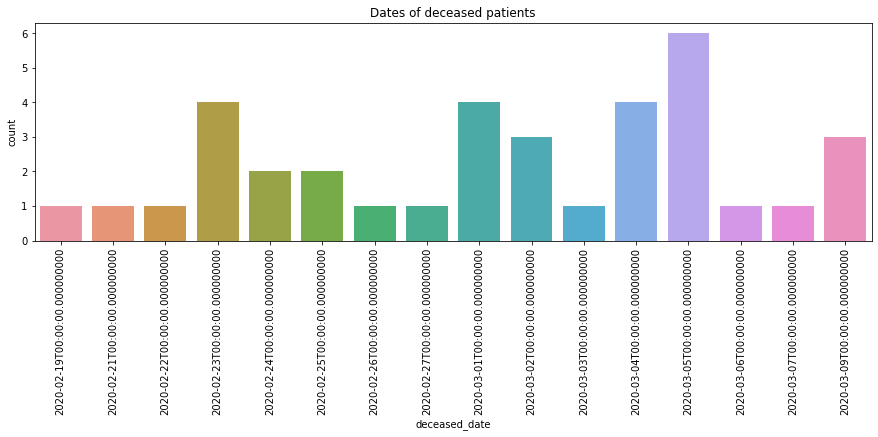

In [40]:
count(deceased, 'deceased_date', "Dates of deceased patients", 15, 4)

There were six number of patients who died on 5th of march and 4 died on 23rd February, 1st and 4th march.